In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("HR Data.csv")
data.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Training Times Last Year    1470 non-null   int64 
 13  Age                         1470 non-null   int6

In [15]:
print(data.describe())

       Employee Number  Training Times Last Year          Age  \
count      1470.000000               1470.000000  1470.000000   
mean       1024.865306                  2.799320    36.923810   
std         602.024335                  1.289271     9.135373   
min           1.000000                  0.000000    18.000000   
25%         491.250000                  2.000000    30.000000   
50%        1020.500000                  3.000000    36.000000   
75%        1555.750000                  3.000000    43.000000   
max        2068.000000                  6.000000    60.000000   

       CF_current Employee   Daily Rate  Distance From Home  Employee Count  \
count          1470.000000  1470.000000         1470.000000          1470.0   
mean              0.838776   802.485714            9.192517             1.0   
std               0.367863   403.509100            8.106864             0.0   
min               0.000000   102.000000            1.000000             1.0   
25%               1

In [16]:
print(data.isnull().sum())

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Training Times Last Year      0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Standard Hours                0
Stock Op

In [22]:
attrition_counts = data['Attrition'].value_counts()
attrition_counts

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [19]:
attrition_rate = (attrition_counts['Yes'] / attrition_counts.sum()) * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

Attrition Rate: 16.12%


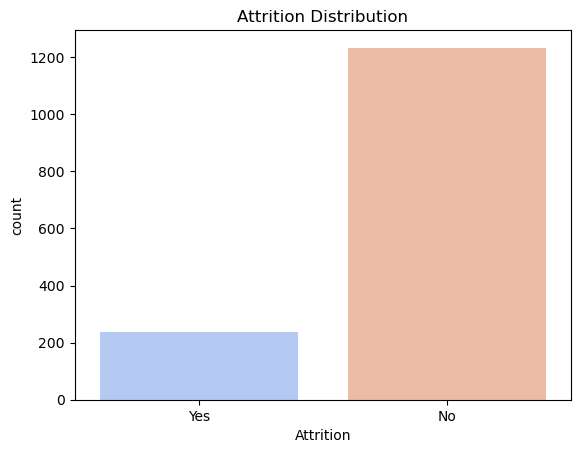

In [23]:
sns.countplot(data=data, x='Attrition', palette='coolwarm')
plt.title("Attrition Distribution")
plt.show()

In [24]:
job_attrition = data.groupby('Job Role')['Attrition'].value_counts(normalize=True).unstack() * 100
print(job_attrition)

Attrition                         No        Yes
Job Role                                       
Healthcare Representative  93.129771   6.870229
Human Resources            76.923077  23.076923
Laboratory Technician      76.061776  23.938224
Manager                    95.098039   4.901961
Manufacturing Director     93.103448   6.896552
Research Director          97.500000   2.500000
Research Scientist         83.904110  16.095890
Sales Executive            82.515337  17.484663
Sales Representative       60.240964  39.759036


Let me break down this code step by step:

data.groupby('Job Role')
This groups the data by the 'Job Role' column, creating separate groups for each unique job role

Attrition
This selects the 'Attrition' column to analyze within each job role group

value_counts(normalize=True)
Counts how many times each attrition value (likely 'Yes'/'No') appears in each job role
normalize=True converts the counts to proportions (0 to 1)

unstack()
Transforms the data from a stacked format to a wide format
Creates separate columns for each attrition value

*100
Converts the proportions to percentages

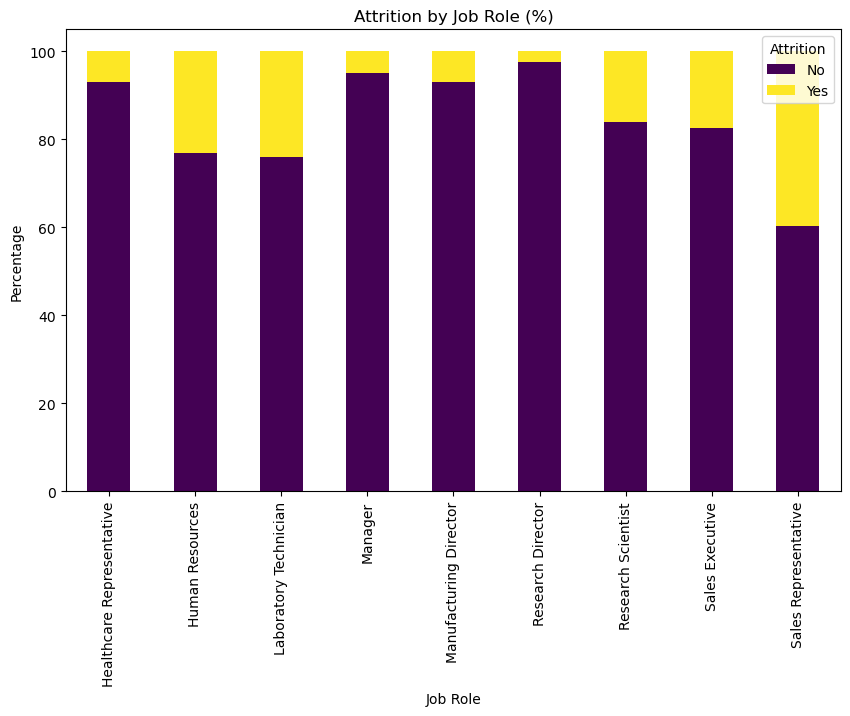

In [25]:
job_attrition.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Attrition by Job Role (%)")
plt.ylabel("Percentage")
plt.show()

In [27]:
numeric_cols = data.select_dtypes(include=np.number)
numeric_cols

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,0,41,0,1102,1,1,2,94,3,...,3,1,80,0,8,1,6,4,0,5
1,2,3,49,1,279,8,1,3,61,2,...,4,4,80,1,10,3,10,7,1,7
2,4,3,37,0,1373,2,1,4,92,2,...,3,2,80,0,7,3,0,0,0,0
3,5,3,33,1,1392,3,1,4,56,3,...,3,3,80,0,8,3,8,7,3,0
4,7,3,27,1,591,2,1,1,40,3,...,3,4,80,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1905,2,34,0,967,16,1,4,85,1,...,4,2,80,1,5,3,5,2,3,0
1466,1868,3,29,0,459,24,1,4,73,2,...,4,2,80,0,1,2,1,0,1,0
1467,1667,2,35,0,880,12,1,4,36,3,...,4,1,80,0,13,4,11,9,6,7
1468,1878,2,22,0,391,7,1,4,75,3,...,4,1,80,0,1,3,1,0,0,0


In [29]:
correlation = numeric_cols.corr()
correlation

,Employee Number,Training Times Last Year,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,Hourly Rate,Job Involvement,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
Employee Number,1.000000,0.023603,-0.010145,0.010577,-0.050990,0.032916,NaN,0.017621,0.035179,-0.006888,...,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
Training Times Last Year,0.023603,1.000000,-0.019621,0.059478,0.002453,-0.036942,NaN,-0.019359,-0.008548,-0.015338,...,-0.015579,0.002497,NaN,0.011274,-0.035662,0.028072,0.003569,-0.005738,-0.002067,-0.004096
Age,-0.010145,-0.019621,1.000000,0.159205,0.010661,-0.001686,NaN,0.010146,0.024287,0.029820,...,0.001904,0.053535,NaN,0.037510,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
CF_current Employee,0.010577,0.059478,0.159205,1.000000,0.056652,-0.077924,NaN,0.103369,0.006846,0.130016,...,-0.002889,0.045872,NaN,0.137145,0.171063,0.063939,0.134392,0.160545,0.033019,0.156199
Daily Rate,-0.050990,0.002453,0.010661,0.056652,1.000000,-0.004985,NaN,0.018355,0.023381,0.046135,...,0.000473,0.007846,NaN,0.042143,0.014515,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Distance From Home,0.032916,-0.036942,-0.001686,-0.077924,-0.004985,1.000000,NaN,-0.016075,0.031131,0.008783,...,0.027110,0.006557,NaN,0.044872,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
Employee Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Environment Satisfaction,0.017621,-0.019359,0.010146,0.103369,0.018355,-0.016075,NaN,1.000000,-0.049857,-0.008278,...,-0.029548,0.007665,NaN,0.003432,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
Hourly Rate,0.035179,-0.008548,0.024287,0.006846,0.023381,0.031131,NaN,-0.049857,1.000000,0.042861,...,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
Job Involvement,-0.006888,-0.015338,0.029820,0.130016,0.046135,0.008783,NaN,-0.008278,0.042861,1.000000,...,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976


C:\Users\divya\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


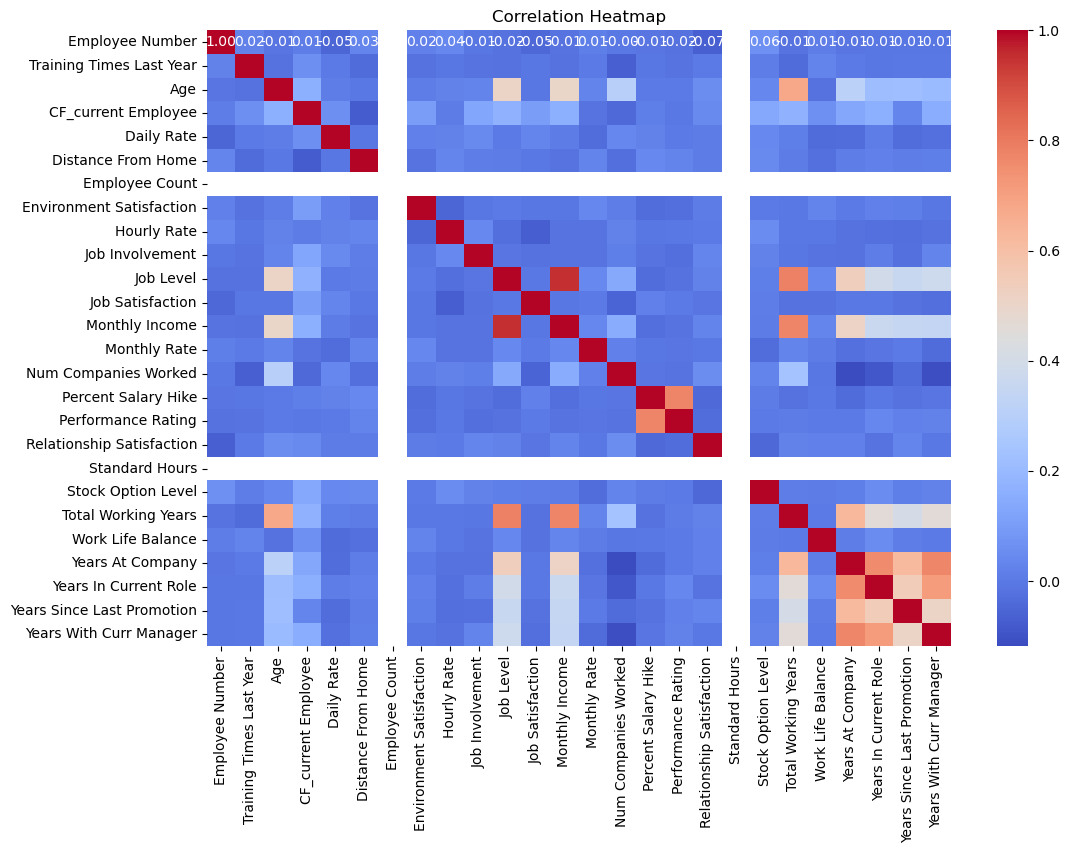

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

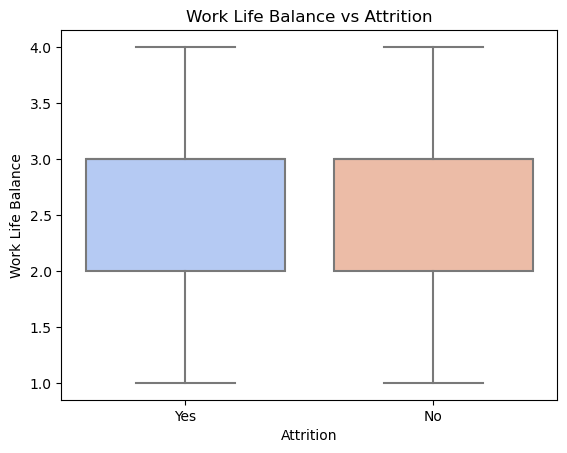

In [31]:
sns.boxplot(data=data, x='Attrition', y='Work Life Balance', palette='coolwarm')
plt.title("Work Life Balance vs Attrition")
plt.show()

In [45]:
# Define features and targets, excluding overfitted columns
X = data_encoded.drop(['Attrition_Yes', 'Job Role_Sales Executive', 'Over Time_Yes'], axis=1)  # Feature set
y = data_encoded[['Over Time_Yes']]  # Focus on the less overfitted target(s)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model using MultiOutputClassifier (with only the remaining targets)
base_model = RandomForestClassifier(random_state=42)
multi_model = MultiOutputClassifier(base_model)
multi_model.fit(X_train, y_train)

# Evaluate the remaining target
y_pred = multi_model.predict(X_test)
for i, target in enumerate(y.columns):
    print(f"\n--- Classification Report for {target} ---\n")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

# Feature Importance Analysis
print("\nFeature Importance Analysis for Remaining Target:")
for i, target in enumerate(y.columns):
    rf_model = multi_model.estimators_[i]
    importances = rf_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print(f"\nTop Features Driving Predictions for {target}:")
    print(feature_importance.head(10))



--- Classification Report for Over Time_Yes ---

              precision    recall  f1-score   support

       False       0.77      0.96      0.85       225
        True       0.31      0.06      0.10        69

    accuracy                           0.75       294
   macro avg       0.54      0.51      0.48       294
weighted avg       0.66      0.75      0.68       294


Feature Importance Analysis for Remaining Target:

Top Features Driving Predictions for Over Time_Yes:
                Feature  Importance
13         Monthly Rate    0.038704
12       Monthly Income    0.037794
0       Employee Number    0.035284
4            Daily Rate    0.034593
8           Hourly Rate    0.034362
2                   Age    0.032170
5    Distance From Home    0.032137
20  Total Working Years    0.030798
22     Years At Company    0.028002
3   CF_current Employee    0.027765
